In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
from scipy.optimize import fmin_tnc

In [2]:
#Marks dataset is 100 scores of two tests, and a binary variable of admitted to college or not

In [3]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header = header)
    return marks_df

In [4]:
data = load_data("data/marks.txt", None)

In [5]:
#Features are all but the last column
X = data.iloc[:, :-1]

#y = target values, last column of the df
y = data.iloc[:, -1]

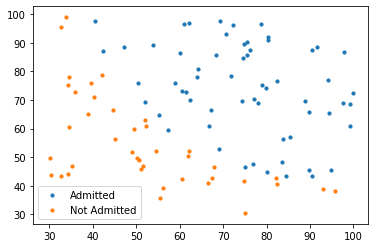

In [6]:
admitted = data.loc[ y == 1]
not_admitted = data.loc[y == 0]

#Plot the admitted and not admitted along with test scores
plt.scatter(admitted.iloc[:,0], admitted.iloc[:, 1], s = 10, label ='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [8]:
#np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
#Prepare the data

#add x0 = 1 for each X
X = np.c_[np.ones((X.shape[0], 1)), X]

#Convert y to column vector
y = y[:, np.newaxis]

#Initialize theta
theta = np.zeros ((X.shape[1], 1))

In [8]:
def sigmoid(x):
    #Activation Function used to map real values between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    #computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    #returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [9]:
def cost_function( theta, x, y):
    #Computes the cost function for all training samples
    m = x.shape[0]
    total_cost = -(1/m) * np.sum( 
        y * np.log(probability(theta, x)) + (1-y) * np.log(1-probability(theta, x)))
    return total_cost

In [10]:
def gradient( theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

In [21]:
def fit( x, y, theta):
    #Use scipy's fmin_tnc function to minimize (could also use gradient descent here)
    opt_weights = fmin_tnc(func = cost_function, x0 = theta, 
                          fprime =  gradient, args = (x, y.flatten()))
    return opt_weights[0]

In [23]:
parameters = fit(X, y, theta)
parameters

array([-25.16131863,   0.20623159,   0.20147149])

## Plot the decision boundary 

In [34]:
#Add 10 to the range of X
x_values = [np.min(X[:, 1]-5), np.max(X[:,2] + 5)]
#Set theta*x equal to zero and simplify to find decision boundary (y is x2)
y_values = - (parameters[0] +np.dot(parameters[1], x_values)) / parameters[2]

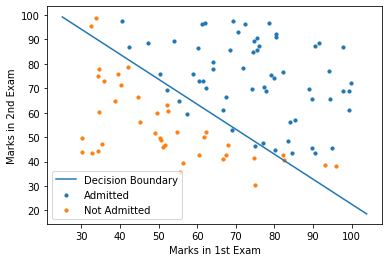

In [36]:
plt.plot(x_values, y_values, label = 'Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:,0], admitted.iloc[:, 1], s = 10, label ='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

## Accuracy of the model

In [41]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

In [42]:
def accuracy(x, actual_classes, probab_threshold = 0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [43]:
accuracy(X, y.flatten())

89.0

In [44]:
# Compare to sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
model = LogisticRegression()
model.fit(X, y.flatten())
predicted_classes = model.predict(X)
#Accuracy
accuracy = accuracy_score(y.flatten(), predicted_classes)
accuracy


0.89

In [53]:
parameters = model.coef_
parameters

array([[-4.19885863e-08,  2.05354461e-01,  2.00583554e-01]])